#### What the code does:

Code regress every single commodity as exploratory variable against other lagged commodities. Lagg -1 and lagg -2 are used. Code adds one regressor to another regressor according to minimal value of Akaike information criteria until Akaike information criterion stops decreasing and starts increasing. 

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsIC
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def lassso(X,y):
    #sample_weight=0
    model = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic"))
    #kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
    #model.fit(X, y, **kwargs)
    
    model.fit(pd.concat([X.shift(periods=1, fill_value=0),X.shift(periods=2, fill_value=0)],axis=1), y)
   
    #print("-------------------")
    #print(model[-1].criterion_,)
    #print(model[-1].criterion_[-1])
    return model[-1].criterion_[-1]
    

In [3]:
def minim(item,itemm,item3,data):
  aic_names=[] 
  aic=[] 
  for item2 in itemm:
         item.append(item2)        
         aic.append(lassso(data[item],data[item3]))
         item.remove(item2)   
         aic_names.append(item2)
         
        
  return(aic_names[aic.index(min(aic))],min(aic))    
           

In [4]:
def letsgo(data):
    #print(data.head())
    fact=list(data.columns)
    t = datetime.datetime.now() 
    print(t)
    result_aic=[]
    result_name=[]
    result_list=[]
    
    for item3 in data.columns:
        item=[]
        itemm=fact.copy()
        stop=0
        b=[]
        for item2,_ in enumerate(data.columns):
            if stop==0:
                a=minim(item,itemm,item3,data)
                item.append(a[0])
                itemm.remove(a[0])
                if len(b)>0:
                    if b[len(b)-1]>a[1]:
                        b.append(a[1])
                    else:
                        stop=1
                        print(list(item))
                        print(item3)
                        result_name.append(item3)
                        result_aic.append(b)
                        result_list.append(list(item))
                if len(b)==0:
                  b.append(a[1])       

    print(datetime.datetime.now()-t)     
    return(result_name,result_aic,result_list)

   

In [5]:
url="https://github.com/dinkelma/quantitativeresearch.eu/blob/master/PYTHON/daily%20data.xlsx"
#!wget(url)

file_location="daily data.xlsx"
data=pd.read_excel(file_location,sheet_name='daily',index_col=0)
data=data.iloc[1:(len(data)-1)]
print(data.isna().sum().sum())
data.fillna(value=None, method='ffill', axis=0, inplace=True, limit=None, downcast=None)
result_name,result_aic,result_list=letsgo(data)
#print(result_name)
#print(result_aic)
#print(result_list)
final=pd.DataFrame(zip(result_name,result_aic,result_list),columns=['name','aic','rlist'])
print(final)


13
2023-01-07 17:18:39.330565
['cotton', 'soybean meal', 'soybean oil', 'crude oil', 'heating oil', 'orange juice', 'lean hogs', 'soybean']
soybean oil
['corn', 'crude oil', 'live cattle', 'cotton', 'natural gas', 'copper', 'coffee', 'feeder cattle', 'orange juice']
corn
['sugar', 'corn', 'heating oil', 'crude oil', 'orange juice']
cocoa
['cotton', 'platinum', 'live cattle', 'wheat', 'copper']
cotton
['feeder cattle', 'gold', 'soybean meal', 'paladium', 'live cattle', 'soybean']
feeder cattle
['orange juice', 'sugar', 'crude oil', 'copper', 'lean hogs', 'corn']
gold
['copper', 'soybean oil', 'platinum', 'natural gas', 'oats']
copper
['silver', 'crude oil', 'orange juice', 'natural gas', 'coffee', 'live cattle']
heating oil
['wheat', 'feeder cattle', 'soybean oil', 'crude oil', 'natural gas', 'platinum']
coffee
['live cattle', 'copper', 'paladium', 'silver', 'soybean meal', 'gold', 'soybean']
live cattle
['oats', 'paladium', 'sugar', 'lean hogs', 'orange juice', 'copper', 'soybean']
lea

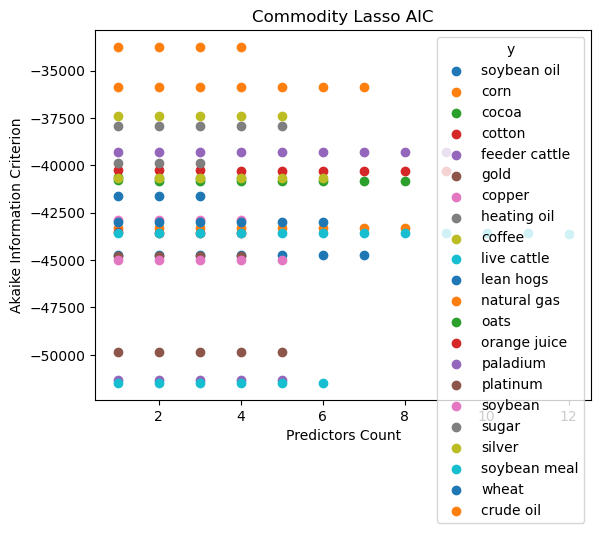

In [6]:

for item,_ in enumerate(final.iloc[0:,1]):
    plt.scatter( list(range(1,len(final.iloc[item,2]))),final.iloc[item,1])
    plt.xlabel('Predictors Count')
    plt.ylabel('Akaike Information Criterion')
    plt.title('Commodity Lasso AIC')
plt.legend(final.iloc[0:,0],loc="upper right", title="y") 